<a href="https://colab.research.google.com/github/rakenny1985/Final-Project/blob/master/FINAL_PROJECT_OLS_China.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys                         
import numpy as np                  
import pandas as pd                    
import matplotlib.pyplot as plt               
import seaborn as sns              
import datetime as dt

In [2]:
us = pd.read_excel("AidData_GlobalChineseOfficialFinanceDataset_v1.0_RKEDITS_FINALPROJECT.xlsx")
print(us.head(5))
#imoprt data


              unique_id           Country  Year  Action Relating to Debt  \
0  Africa, regional2001  Africa, regional  2001                      0.0   
1  Africa, regional2006  Africa, regional  2006                      0.0   
2  Africa, regional2007  Africa, regional  2007                      0.0   
3  Africa, regional2009  Africa, regional  2009                      0.0   
4  Africa, regional2011  Africa, regional  2011                      0.0   

   Agriculture, Forestry and Fishing  Business and Other Services  \
0                                0.0                          0.0   
1                                0.0                          0.0   
2                                0.0                          0.0   
3                                0.0                          0.0   
4                                0.0                          0.0   

   Communications  Developmental Food Aid/Food Security Assistance  Education  \
0        0.000000                              

In [3]:
polity = pd.read_excel("Polity_IV_country_gov_type_unique_FINALPROJECT.xlsx")
print(polity.head(5))

           unique_id scode        country  year  democ  autoc  polity
0  United States1946   USA  United States  1946     10      0      10
1  United States1947   USA  United States  1947     10      0      10
2  United States1948   USA  United States  1948     10      0      10
3  United States1949   USA  United States  1949     10      0      10
4  United States1950   USA  United States  1950     10      0      10


In [4]:
freedom=pd.read_excel('human_freedom_sub_saharan_rk_edit_FINALPROJECT.xlsx')
freedom.dropna()
freedom.dtypes

unique_id                  object
Year                        int64
ISO Code                   object
Countries                  object
Region                     object
human_freedom_score       float64
human_freedom_rank          int64
personal_freedom_score    float64
personal_freedom_rank       int64
economic_freedom_score    float64
economic_freedom_rank       int64
dtype: object

In [0]:
freedom = freedom[np.isfinite(freedom['human_freedom_score'])]

In [6]:
wb=pd.read_excel('world_bank_gdp_RKEDIT_FINALPROJECT.xlsx')
print(wb.head(5))

    unique_id    name code    year gdp_per_capita
0  Angola2000  Angola  AGO  2000.0        2189.56
1  Angola2001  Angola  AGO  2001.0        2208.79
2  Angola2002  Angola  AGO  2002.0        2426.43
3  Angola2003  Angola  AGO  2003.0        2412.39
4  Angola2004  Angola  AGO  2004.0        2582.65


In [7]:
print (list(wb))
print(list(freedom))
print (list(polity))
print(list(us))

['unique_id', 'name', 'code', 'year', 'gdp_per_capita']
['unique_id', 'Year', 'ISO Code', 'Countries', 'Region', 'human_freedom_score', 'human_freedom_rank', 'personal_freedom_score', 'personal_freedom_rank', 'economic_freedom_score', 'economic_freedom_rank']
['unique_id', 'scode', 'country', 'year', 'democ', 'autoc', 'polity']
['unique_id', 'Country', 'Year', 'Action Relating to Debt', 'Agriculture, Forestry and Fishing', 'Business and Other Services', 'Communications', 'Developmental Food Aid/Food Security Assistance', 'Education', 'Emergency Response', 'Energy Generation and Supply', 'General Budget Support', 'General Environmental Protection', 'Government and Civil Society', 'Health', 'Industry, Mining, Construction', 'Non-food commodity assistance', 'Other Multisector', 'Other Social infrastructure and services', 'Population Policies / Programmes and Reproductive Health', 'Support to Non-governmental Organizations (NGOs) and Government Organizations', 'Trade and Tourism', 'Transpo

In [8]:
data_us_new = us[["unique_id","Year", "Total"]]
print(data_us_new.head(3))
data_freedom_new = freedom[["unique_id", "human_freedom_score"]]
print(data_freedom_new.head(3))
data_wb_new = wb[["unique_id", "gdp_per_capita"]]
print(data_wb_new.head(3))
data_polity_new = polity[["unique_id", "polity"]]
print(data_polity_new.head(3))

              unique_id  Year       Total
0  Africa, regional2001  2001   27.237943
1  Africa, regional2006  2006  377.998959
2  Africa, regional2007  2007  172.518381
      unique_id  human_freedom_score
0    Angola2016             5.640662
1     Benin2016             6.738488
2  Botswana2016             7.153167
    unique_id gdp_per_capita
0  Angola2000        2189.56
1  Angola2001        2208.79
2  Angola2002        2426.43
           unique_id  polity
0  United States1946      10
1  United States1947      10
2  United States1948      10


In [9]:
data_aid_country = data_wb_new.merge(data_freedom_new, on="unique_id", how="inner")

print(data_aid_country.tail(10))


        unique_id gdp_per_capita  human_freedom_score
260    Zambia2014        1620.82             6.331482
261    Zambia2015        1618.46             6.434490
262  Zimbabwe2008        662.487             4.935571
263  Zimbabwe2009        728.566             4.927673
264  Zimbabwe2010        854.848             4.909415
265  Zimbabwe2011        955.805             5.050736
266  Zimbabwe2012        1090.52             5.084810
267  Zimbabwe2013        1086.83             5.347535
268  Zimbabwe2014        1086.87             5.467683
269  Zimbabwe2015        1080.57             5.582640


In [10]:
data_aid_country1 = data_aid_country.merge(data_polity_new, on="unique_id", how="inner")
print(data_aid_country1.tail(10))

        unique_id gdp_per_capita  human_freedom_score  polity
242    Zambia2014        1620.82             6.331482       7
243    Zambia2015        1618.46             6.434490       7
244  Zimbabwe2008        662.487             4.935571      -4
245  Zimbabwe2009        728.566             4.927673       1
246  Zimbabwe2010        854.848             4.909415       1
247  Zimbabwe2011        955.805             5.050736       1
248  Zimbabwe2012        1090.52             5.084810       1
249  Zimbabwe2013        1086.83             5.347535       4
250  Zimbabwe2014        1086.87             5.467683       4
251  Zimbabwe2015        1080.57             5.582640       4


In [11]:
data_aid_country1.dtypes

unique_id               object
gdp_per_capita          object
human_freedom_score    float64
polity                   int64
dtype: object

In [0]:
data_aid_country1['human_freedom_score']=pd.to_numeric(data_aid_country1['human_freedom_score'],errors='coerce')

In [13]:
data_aid_country1.dtypes

unique_id               object
gdp_per_capita          object
human_freedom_score    float64
polity                   int64
dtype: object

In [14]:
data_aid_country1['gdp_per_capita']=pd.to_numeric(data_aid_country1['gdp_per_capita'],errors='coerce')
data_aid_country1.dtypes

unique_id               object
gdp_per_capita         float64
human_freedom_score    float64
polity                   int64
dtype: object

In [15]:
data_aid_country1.set_index('unique_id')

,gdp_per_capita,human_freedom_score,polity
unique_id,,,
Angola2008,3641.447502,4.823528,-2
Angola2009,3544.026552,5.206898,-2
Angola2010,3585.905553,5.237695,-2
Angola2011,3580.269910,5.354951,-2
Angola2012,3750.209097,5.832180,-2
Angola2013,3799.429617,5.994839,-2
Angola2014,3846.240911,5.618964,-2
Angola2015,3751.694465,5.786479,-2
Benin2008,767.031819,6.490138,7


In [16]:
data_us_new.set_index('unique_id')

,Year,Total
unique_id,,
"Africa, regional2001",2001,27.237943
"Africa, regional2006",2006,377.998959
"Africa, regional2007",2007,172.518381
"Africa, regional2009",2009,54.148242
"Africa, regional2011",2011,83.249049
"Africa, regional2001",2001,81.746313
"Africa, regional2013",2013,429.069920
"Africa, regional2014",2014,28.540000
Algeria2000,2000,6.780529


In [17]:
data_aid_country2 = data_aid_country1.merge(data_us_new, on="unique_id", how="inner")
print(data_aid_country2.tail(10))

        unique_id  gdp_per_capita  human_freedom_score  polity  Year  \
125    Zambia2010     1463.213573             6.718691       7  2010   
126    Zambia2011     1499.728311             6.990259       7  2011   
127    Zambia2013     1595.915037             6.695434       7  2013   
128    Zambia2014     1620.823290             6.331482       7  2014   
129  Zimbabwe2008      662.486544             4.935571      -4  2008   
130  Zimbabwe2009      728.566274             4.927673       1  2009   
131  Zimbabwe2010      854.847665             4.909415       1  2010   
132  Zimbabwe2011      955.805432             5.050736       1  2011   
133  Zimbabwe2013     1086.826568             5.347535       4  2013   
134  Zimbabwe2014     1086.873532             5.467683       4  2014   

          Total  
125   72.635216  
126  106.404106  
127    8.138738  
128  401.000000  
129   10.611615  
130    9.716827  
131   98.061753  
132  186.857141  
133   39.708331  
134  307.530000  


In [18]:
df=data_aid_country2.set_index('Year')
df

,unique_id,gdp_per_capita,human_freedom_score,polity,Total
Year,,,,,
2008,Angola2008,3641.447502,4.823528,-2,39.709939
2011,Angola2011,3580.269910,5.354951,-2,0.343572
2013,Angola2013,3799.429617,5.994839,-2,32.820950
2014,Angola2014,3846.240911,5.618964,-2,84.256545
2008,Benin2008,767.031819,6.490138,7,39.688633
2009,Benin2009,763.154718,6.486474,7,17.244450
2013,Benin2013,805.967160,6.907810,7,66.984387
2014,Benin2014,833.640878,6.751381,7,0.840000
2008,Botswana2008,6552.776641,6.835826,8,0.222182


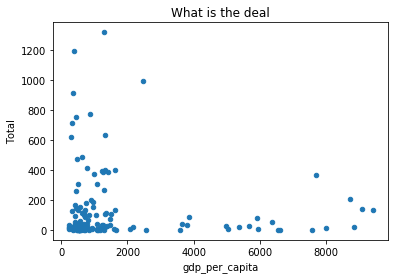

In [19]:
df.plot(y='Total',x='gdp_per_capita',kind='scatter',title='What is the deal')

In [20]:
import statsmodels.api as sm # import statsmodels 
X = df["gdp_per_capita"]
y = df["Total"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     8.842
Date:                Fri, 10 May 2019   Prob (F-statistic):            0.00349
Time:                        22:01:28   Log-Likelihood:                -944.08
No. Observations:                 135   AIC:                             1890.
Df Residuals:                     134   BIC:                             1893.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gdp_per_capita     0.0252      0.008      2.974      0.003       0.008       0.042
==============================================================================
Omnibus:                       91.559   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              449.642
Skew:                           2.565   Prob(JB):                     2.30e-98
Kurtosis:                      10.323   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
df["logGDP"] = np.log(df["gdp_per_capita"])#logging gdp and total oda for analysis
df["logTotal"] = np.log(df["Total"])

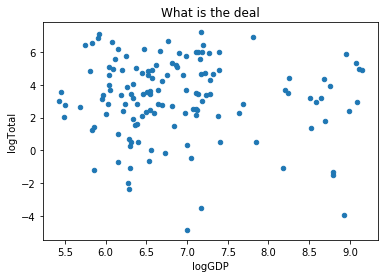

In [22]:
df.plot(y='logTotal',x='logGDP',kind='scatter',title='What is the deal') #checkin plots

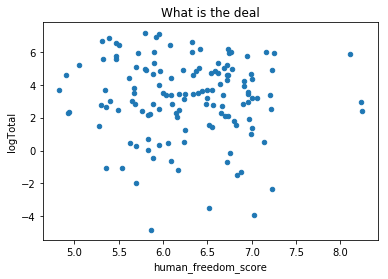

In [0]:
df.plot(y='logTotal',x='human_freedom_score',kind='scatter',title='What is the deal')#checkin plots

In [30]:
X = df[['human_freedom_score', 'logGDP', 'polity']]

y = df['logTotal'] #Regression with all independent variables


est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logTotal   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     85.11
Date:                Fri, 10 May 2019   Prob (F-statistic):           1.05e-30
Time:                        22:17:04   Log-Likelihood:                -305.25
No. Observations:                 135   AIC:                             616.5
Df Residuals:                     132   BIC:                             625.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
human_freedom_score     0.5485      0.235      2.332      0.021       0.083       1.014
logGDP                  0.0316      0.210      0.151      0.881      -0.384       0.447
polity                 -0.1608      0.046     -3.458      0.001      -0.253      -0.069
==============================================================================
Omnibus:                       13.797   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.781
Skew:                          -0.761   Prob(JB):                     0.000617
Kurtosis:                       3.557   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

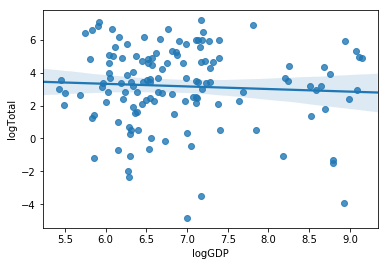

In [0]:
sns.regplot (y='logTotal', x='logGDP', data=df)
#checking different plots

In [0]:
X = df[['gdp_per_capita']]

y = df['Total']#playing around with different combos


est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     8.842
Date:                Thu, 09 May 2019   Prob (F-statistic):            0.00349
Time:                        04:50:46   Log-Likelihood:                -944.08
No. Observations:                 135   AIC:                             1890.
Df Residuals:                     134   BIC:                             1893.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gdp_per_capita     0.0252      0.008      2.974      0.003       0.008       0.042
==============================================================================
Omnibus:                       91.559   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              449.642
Skew:                           2.565   Prob(JB):                     2.30e-98
Kurtosis:                      10.323   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
X = df[['gdp_per_capita', "human_freedom_score"]]

y = df['Total']
#different combos
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.304
Date:                Thu, 09 May 2019   Prob (F-statistic):              0.275
Time:                        04:17:03   Log-Likelihood:                -928.56
No. Observations:                 135   AIC:                             1863.
Df Residuals:                     132   BIC:                             1872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 419.8989    202.935      2.069      0.040      18.473     821.324
gdp_per_capita         -0.0041      0.010     -0.402      0.689      -0.024       0.016
human_freedom_score   -44.5843     32.916     -1.354      0.178    -109.696      20.527
==============================================================================
Omnibus:                       94.592   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.995
Skew:                           2.649   Prob(JB):                    1.08e-106
Kurtosis:                      10.660   Cond. No.                     2.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""